In [2]:
!pip install yfinance

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ticker = 'KO' # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01',
end='2023-10-4')

/tmp/ipython-input-3767777495.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01',
[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,29.992603,30.177656,29.750613,30.078011,9921100
1,2015-01-05,29.992603,30.583346,29.949901,30.384058,26292600
2,2015-01-06,30.220352,30.561986,30.063772,30.184766,16897500
3,2015-01-07,30.597574,30.682982,30.305762,30.462342,13412300
4,2015-01-08,30.967676,31.010381,30.675864,30.732804,21743600


In [5]:
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [6]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,29.992603,30.177656,29.750613,30.078011,9921100
1,2015-01-05,29.992603,30.583346,29.949901,30.384058,26292600
2,2015-01-06,30.220352,30.561986,30.063772,30.184766,16897500
3,2015-01-07,30.597574,30.682982,30.305762,30.462342,13412300
4,2015-01-08,30.967676,31.010381,30.675864,30.732804,21743600


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2203 non-null   datetime64[ns]
 1   Close   2203 non-null   float64       
 2   High    2203 non-null   float64       
 3   Low     2203 non-null   float64       
 4   Open    2203 non-null   float64       
 5   Volume  2203 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 103.4 KB
None


In [8]:
data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [9]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

In [10]:
data['Daily_Return'] = data['Close'].pct_change()

In [11]:
data.head()

,Date,Close,High,Low,Open,Volume,MA_20,MA_50,Daily_Return
0,2015-01-02,29.992603,30.177656,29.750613,30.078011,9921100,NaN,NaN,NaN
1,2015-01-05,29.992603,30.583346,29.949901,30.384058,26292600,NaN,NaN,0.000000
2,2015-01-06,30.220352,30.561986,30.063772,30.184766,16897500,NaN,NaN,0.007594
3,2015-01-07,30.597574,30.682982,30.305762,30.462342,13412300,NaN,NaN,0.012482
4,2015-01-08,30.967676,31.010381,30.675864,30.732804,21743600,NaN,NaN,0.012096


In [14]:
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

In [15]:
data.dropna(inplace=True)

In [18]:
data

,Date,Close,High,Low,Open,Volume,MA_20,MA_50,Daily_Return,Volatility
49,2015-03-16,28.913832,28.956889,28.698539,28.705715,15238800,29.748192,29.998750,0.009522,0.011377
50,2015-03-17,29.071714,29.229597,28.935363,29.186537,21661800,29.713892,29.980332,0.005460,0.011464
51,2015-03-18,29.136301,29.272655,28.562187,29.050185,26247500,29.685668,29.963206,0.002222,0.011486
52,2015-03-19,28.720062,29.078884,28.677003,29.050177,16057600,29.623109,29.933200,-0.014286,0.011604
53,2015-03-20,29.172186,29.179361,28.712892,28.755952,31608500,29.588139,29.904693,0.015742,0.012260
...,...,...,...,...,...,...,...,...,...,...
2198,2023-09-27,52.686836,53.233007,52.432583,53.129422,13766300,54.654470,56.207795,-0.010260,0.007236
2199,2023-09-28,52.555004,53.035258,52.451419,52.950507,12484800,54.457470,56.107134,-0.002502,0.007206
2200,2023-09-29,52.715092,52.988179,52.376087,52.865760,12271600,54.298371,55.995660,0.003046,0.007153
2201,2023-10-02,52.244247,52.743335,51.867579,52.649169,11792500,54.140021,55.873835,-0.008932,0.007164


In [19]:
data.describe()

,Date,Close,High,Low,Open,Volume,MA_20,MA_50,Daily_Return,Volatility
count,2154,2154.000000,2154.000000,2154.000000,2154.000000,2.154000e+03,2154.000000,2154.000000,2154.000000,2154.000000
mean,2019-06-23 01:58:19.721448704,41.718704,42.006617,41.427040,41.723047,1.406691e+07,41.613635,41.435332,0.000341,0.009992
min,2015-03-16 00:00:00,27.488180,27.872279,26.453481,27.488177,2.996300e+06,28.141969,28.942741,-0.096725,0.003597
25%,2017-05-03 06:00:00,33.810349,33.999072,33.591135,33.815693,1.018370e+07,33.685546,33.550300,-0.004569,0.006715
50%,2019-06-24 12:00:00,39.554152,39.957336,39.282476,39.606728,1.273885e+07,39.237903,39.091639,0.000484,0.008675
75%,2021-08-11 18:00:00,49.046687,49.403722,48.705761,49.043898,1.600262e+07,48.739770,48.569796,0.005882,0.011162
max,2023-10-03 00:00:00,59.625149,60.516683,59.396649,60.336576,6.784570e+07,59.194986,58.078910,0.064796,0.053882
std,NaN,9.254808,9.332478,9.172732,9.261362,6.179191e+06,9.215455,9.137860,0.011547,0.005942


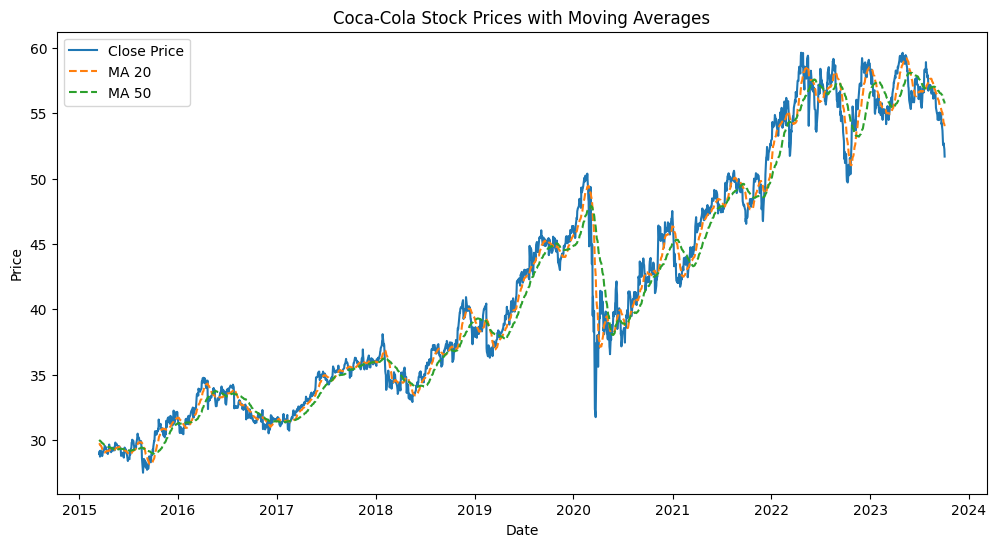

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20',linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='MA 50',linestyle='--')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

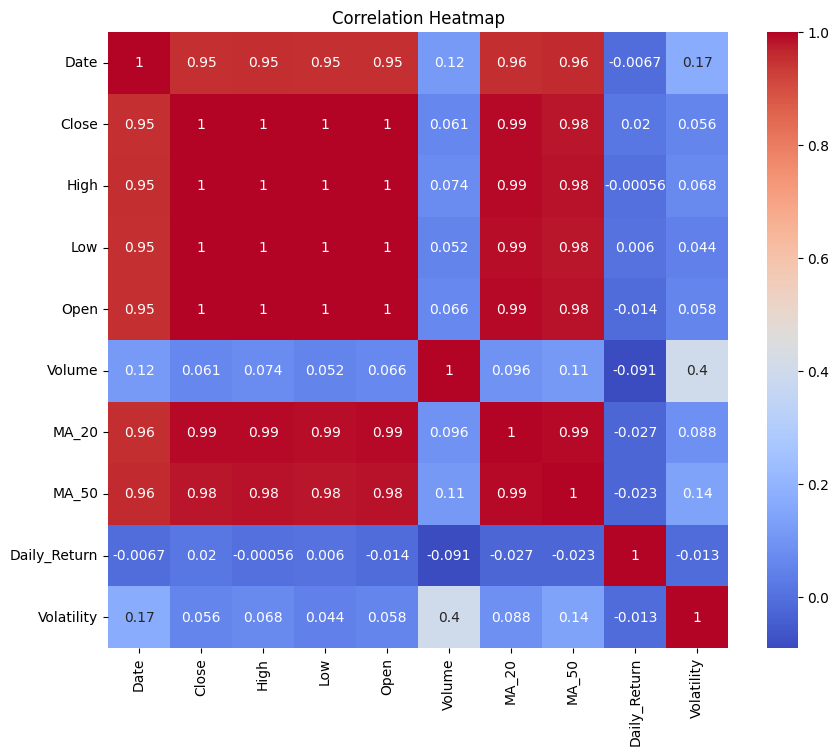

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, shuffle=False)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [29]:
mse

7.551233352945223

In [30]:
mae

2.2962884305524707

In [31]:
live_data = yf.download(ticker, period='1d', interval='1m')

/tmp/ipython-input-4146498620.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download(ticker, period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed


In [32]:
live_data['MA_20'] =live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] =live_data['Close'].rolling(window=50).mean()

In [33]:
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] =live_data['Daily_Return'].rolling(window=20).std()

In [34]:
live_data.fillna(0, inplace=True)

In [35]:
latest_features = live_data[features].iloc[-1:].dropna()
live_prediction = model.predict(latest_features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [36]:
print(f"Predicted Closing Price: {live_prediction[0]}")

Predicted Closing Price: 54.24466667175293


In [39]:
import streamlit as st

In [38]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 143.1 MB/s eta 0:00:00


In [40]:
st.title('Coca-Cola Stock Price Prediction')

2025-10-04 11:48:27.898 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:28.439 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-04 11:48:28.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:28.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [41]:
st.line_chart(data[['Close', 'MA_20', 'MA_50']])

2025-10-04 11:48:44.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:44.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:44.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [42]:
st.write(f"Predicted Closing Price: {live_prediction[0]}")

2025-10-04 11:48:52.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:52.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 11:48:52.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
